In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("fifa_eda.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

In [5]:
df.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [6]:
df['Weight'].fillna('200lbs', inplace = True)
df['Contract Valid Until'].fillna(2019, inplace = True)
df['Height'].fillna("5'11", inplace = True)
df['Joined'].fillna('Jul 1, 2018', inplace = True)
df['ID'].fillna(8, inplace = True)
df['Position'].fillna('ST', inplace = True)
df['Club'].fillna('No Club', inplace = True)
df['Skill Moves'].fillna(df['Skill Moves'].median(), inplace = True)
df['Preferred Foot'].fillna('Right', inplace = True)
df['International Reputation'].fillna(1, inplace = True)
df['Wage'].fillna('€200K', inplace = True)

/tmp/ipykernel_6113/562534132.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight'].fillna('200lbs', inplace = True)
/tmp/ipykernel_6113/562534132.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [9]:
df.sample()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
12164,221206,D. Björnquist,29,Sweden,63,63,Örebro SK,280.0,1.0,Right,1.0,2.0,RWB,2018,2020-01-01,5.833333,170.0,350.0


In [11]:
df.fillna(0, inplace = True)

In [12]:
def country(x):
    return df[df['Nationality'] == x].head()


# prepare dataset for Indian players
country('India')

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
8605,190939,S. Chhetri,33,India,67,67,No Club,0.0,0.0,Right,1.0,3.0,LS,2016,2019,5.583333,154.0,4585.060806
10011,223763,S. Jhingan,24,India,65,71,No Club,0.0,0.0,Right,1.0,2.0,RCB,2016,2019,6.166667,163.0,4585.060806
12598,217225,J. Lalpekhlua,27,India,63,64,No Club,0.0,0.0,Right,1.0,2.0,RS,2016,2019,5.750000,165.0,4585.060806
12811,225213,G. Singh Sandhu,26,India,63,68,No Club,0.0,0.0,Right,1.0,1.0,GK,2016,2019,6.333333,198.0,4585.060806
13508,238205,A. Edathodika,31,India,62,62,No Club,0.0,0.0,Left,1.0,2.0,LCB,2016,2019,6.000000,172.0,4585.060806


In [17]:
corr = df.corr(numeric_only=True)

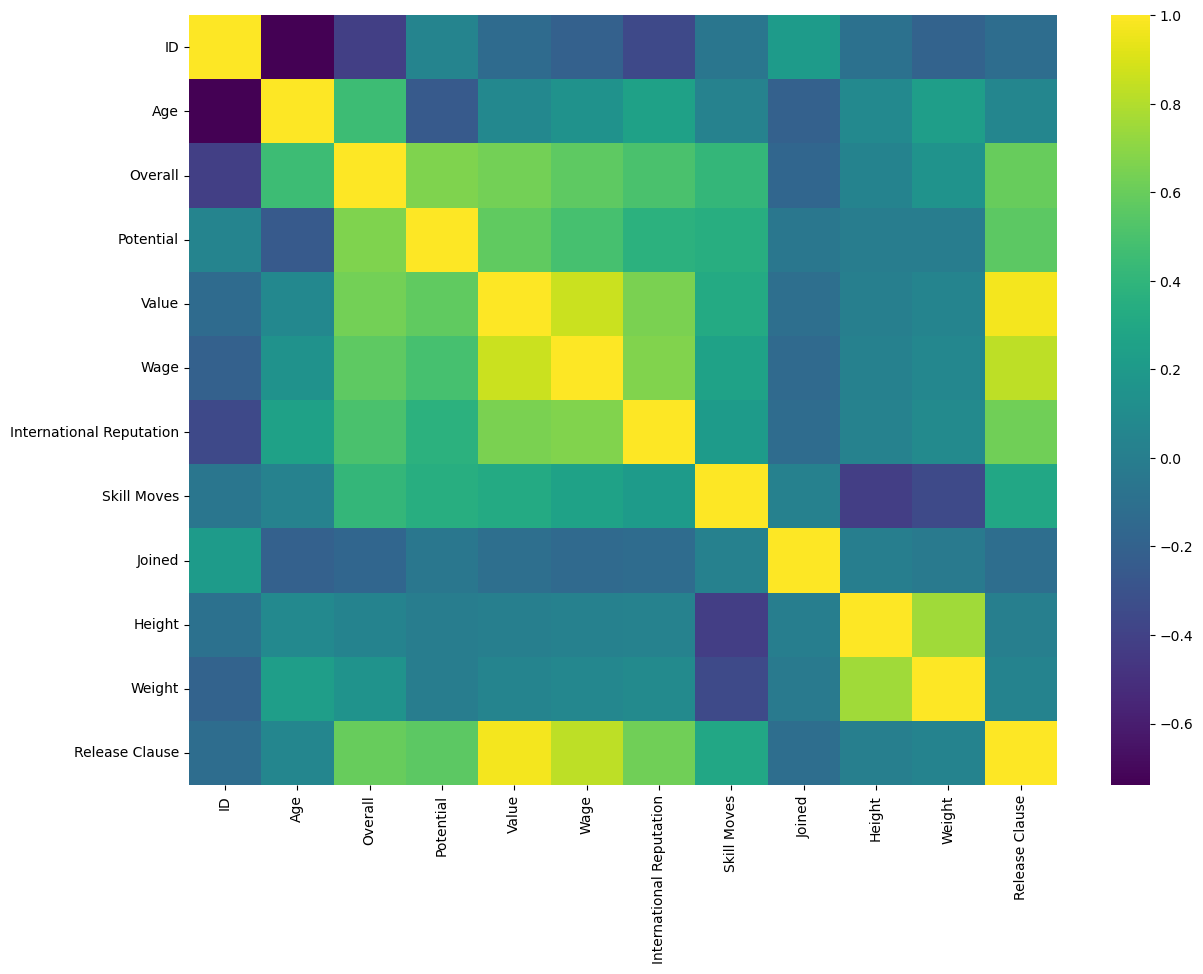

In [18]:
plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap='viridis')
plt.show()

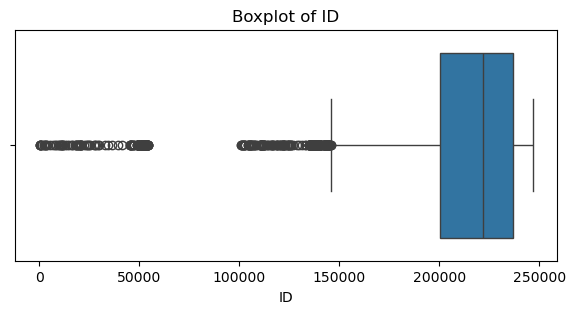

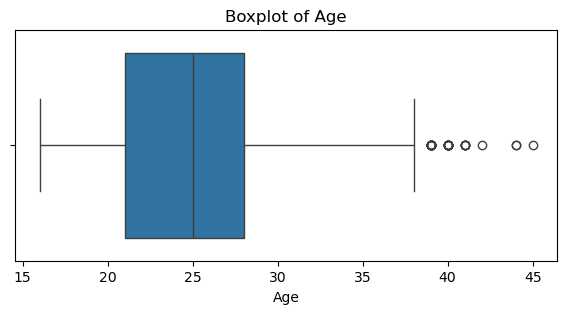

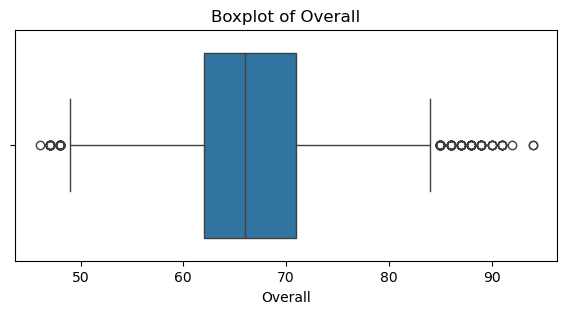

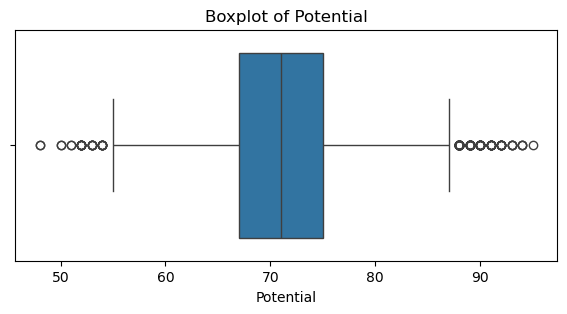

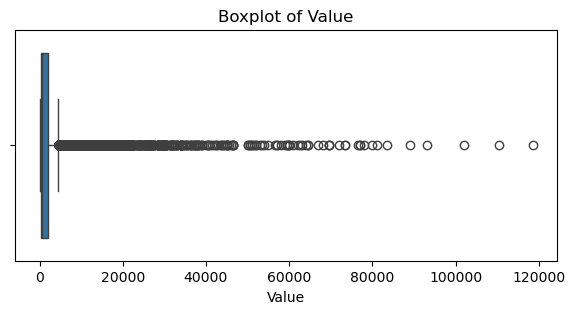

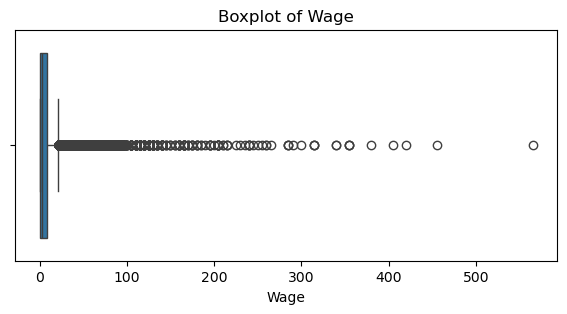

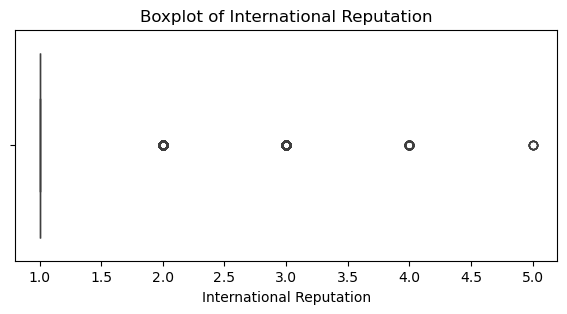

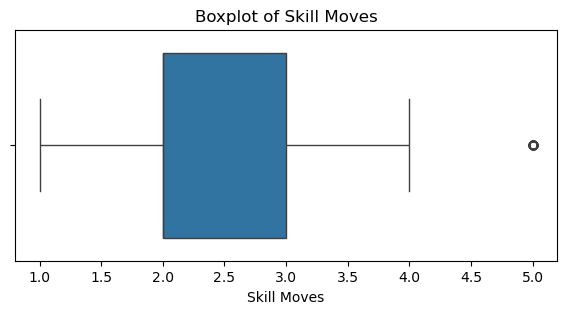

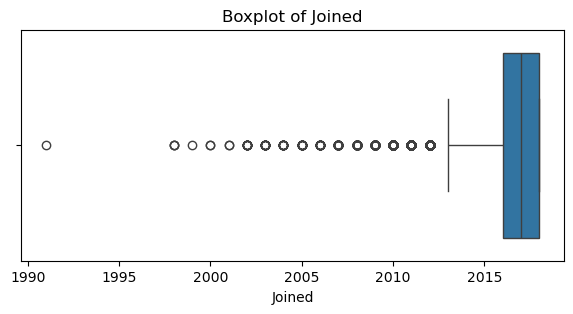

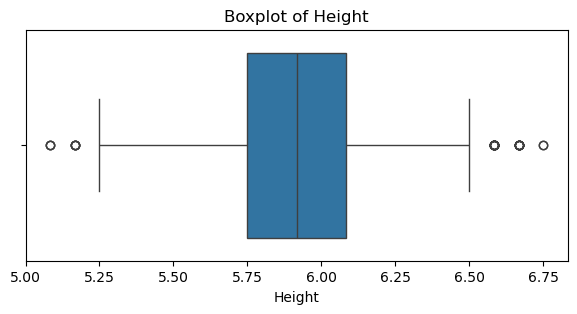

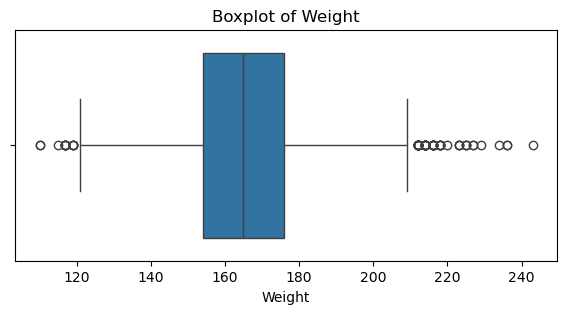

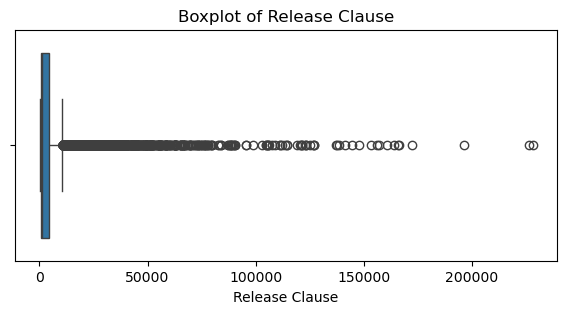

In [20]:
numeric_df = df.select_dtypes(include=['number','float'])
for col in numeric_df.columns:
    plt.figure(figsize=(7, 3))
    sns.boxplot(x=numeric_df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [21]:
df.describe()

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Joined,Height,Weight,Release Clause
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,214298.338606,25.122206,66.238699,71.307299,2410.695886,9.731312,1.112924,2.360356,2016.420607,5.946771,165.979129,4585.060971
std,29965.244204,4.669943,6.908930,6.136496,5594.932671,21.999290,0.393554,0.755394,2.018194,0.220514,15.572775,10630.414430
min,16.000000,16.000000,46.000000,48.000000,0.000000,0.000000,1.000000,1.000000,1991.000000,5.083333,110.000000,13.000000
25%,200315.500000,21.000000,62.000000,67.000000,300.000000,1.000000,1.000000,2.000000,2016.000000,5.750000,154.000000,570.000000
50%,221759.000000,25.000000,66.000000,71.000000,675.000000,3.000000,1.000000,2.000000,2017.000000,5.916667,165.000000,1300.000000
75%,236529.500000,28.000000,71.000000,75.000000,2000.000000,9.000000,1.000000,3.000000,2018.000000,6.083333,176.000000,4585.060806
max,246620.000000,45.000000,94.000000,95.000000,118500.000000,565.000000,5.000000,5.000000,2018.000000,6.750000,243.000000,228100.000000
